In [3]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import disjoint_domain as dd

_, ctx_names = dd.get_contexts()
pca = PCA(n_components=2)
colors = dd.get_domain_colors()

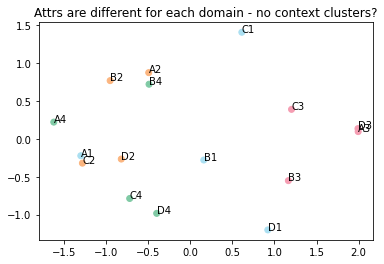

In [4]:
with np.load('data/original_single_long_dd_res_2021-07-08_02-24-33.npz', allow_pickle=True) as resfile:
    resfile_snaps = resfile['snapshots'].item()

ctx_repr_2D = pca.fit_transform(resfile_snaps['context'][0, -1])

fig, ax = plt.subplots()
ax.scatter(*ctx_repr_2D.T, c=np.tile(colors[:4], 4))
for c in range(16):
    ax.annotate(ctx_names[c], ctx_repr_2D[c])
ax.set_title('Attrs are different for each domain - no context clusters?')
plt.show()

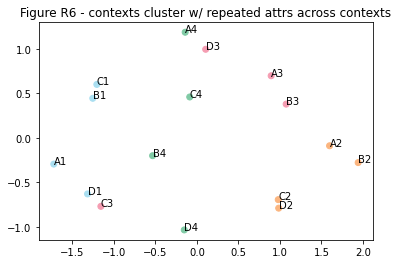

In [5]:
# Repeated attrs version - each domain is the same modulo outputting on its own units
with np.load('data/repeated_attrs_long_dd_res_2021-07-08_02-35-01.npz', allow_pickle=True) as resfile_rep_attrs:
    resfile_rep_attrs_snaps = resfile_rep_attrs['snapshots'].item()

ctx_repr_2D_rep_attrs = pca.fit_transform(resfile_rep_attrs_snaps['context'][0, -1])

fig, ax = plt.subplots()
ax.scatter(*ctx_repr_2D_rep_attrs.T, c=np.tile(colors[:4], 4))
for c in range(16):
    ax.annotate(ctx_names[c], ctx_repr_2D_rep_attrs[c])
ax.set_title('Figure R6 - contexts cluster w/ repeated attrs across domains')
plt.show()